# Imports

In [1]:
import wrangle as w     
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = w.prepare()
train, validate, test = w.split(w.prepare())

In [3]:
train.head()

,is_male,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,internet_service_type_fiber_optic,internet_service_type_none,contract_type_one_year,contract_type_two_year,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check,customer_id
4604,1,0,1,0,31,1,1,0,0,1,...,2683.20,0,1,0,0,0,1,0,0,9777-WJJPR
5566,1,0,0,1,13,1,0,1,0,0,...,670.65,0,0,0,0,0,1,0,0,5639-NTUPK
6204,1,0,0,0,36,1,0,0,1,0,...,2498.40,1,0,0,1,0,0,0,1,7541-YLXCL
5837,0,0,0,0,45,1,1,0,0,1,...,3941.70,1,1,0,0,0,0,1,0,6439-GTPCA
1276,0,0,1,1,64,1,1,1,1,1,...,5817.45,0,0,0,0,1,0,0,1,1897-OKVMW


# I want to explore just based off charges first: Let's set up some hypothesis,

### H$_0$: Mean of monthly_charges of churned customers <= Mean of monthly charges of all customers

### H$_a$: Mean of monthly_charges of churned customers >= Mean of monthly charges of all customers

## lets check out our data by isolating the columns 

In [4]:
charges = []
for cols in train.columns:
    if 'charges' in cols:
        charges.append(cols)
    else:
        pass
charges.append('churn')

    Now lets subset our data

In [5]:
customer_charges = train[charges]

<Axes: xlabel='monthly_charges', ylabel='total_charges'>

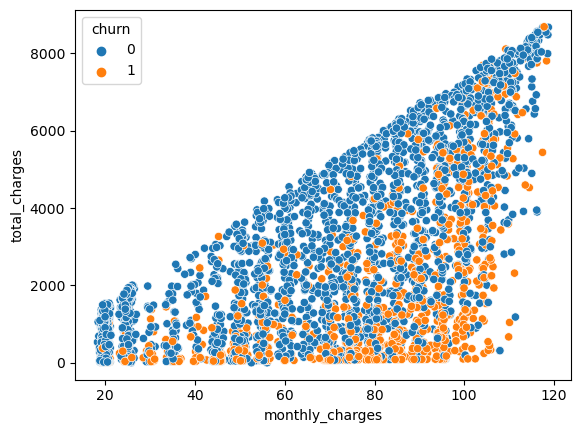

In [6]:
sns.scatterplot(customer_charges, y='total_charges', x= 'monthly_charges', hue = 'churn')

In [7]:
customer_charges.head()

,monthly_charges,total_charges,churn
4604,88.65,2683.20,0
5566,52.10,670.65,0
6204,65.40,2498.40,1
5837,87.25,3941.70,1
1276,90.60,5817.45,0


In [8]:
## I want to seperate this into churn and not churn 
charges_churn = customer_charges[customer_charges.churn == 1]

charges_not_churn = customer_charges[customer_charges.churn == 0]

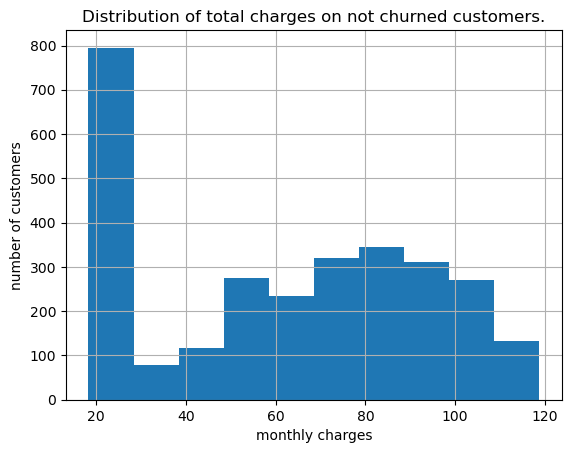

In [9]:
charges_not_churn.monthly_charges.hist()
plt.title('Distribution of total charges on not churned customers.')
plt.xlabel('monthly charges')
plt.ylabel('number of customers')
plt.show()

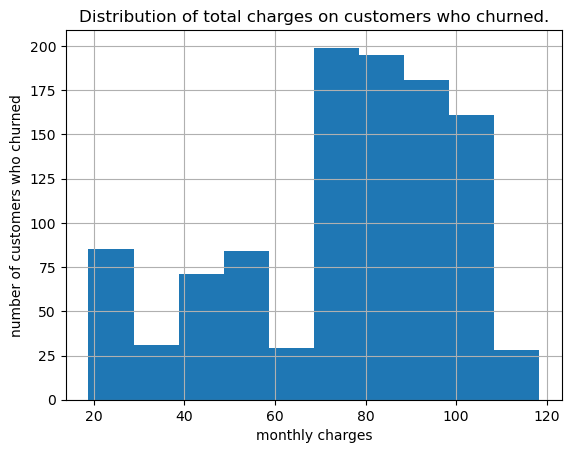

In [10]:
charges_churn.monthly_charges.hist()
plt.title('Distribution of total charges on customers who churned.')
plt.xlabel('monthly charges')
plt.ylabel('number of customers who churned')
plt.show()

    Keytakeaways:
    - looks like 70.00 - 110.00 have the highest churn rate count 

In [11]:
import scipy.stats as stats
alpha = .05

churned_monthly_charges = charges_churn.monthly_charges
mean_of_population = df.monthly_charges.mean()


In [12]:
t, p = stats.ttest_1samp(churned_monthly_charges, mean_of_population)


In [13]:
if p/2 > alpha:
    print("We fail to reject null hypothesis")
elif t < 0:
    print("We fail to reject null hypothesis")
else:
    print("We reject null hypothesis")

We reject null hypothesis


## So we can see that there is a difference between monthly charges and churn rate, now lets investigate by services. I now want to look at contract types

In [14]:
train.head(1)

,is_male,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,internet_service_type_fiber_optic,internet_service_type_none,contract_type_one_year,contract_type_two_year,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check,customer_id
4604,1,0,1,0,31,1,1,0,0,1,...,2683.2,0,1,0,0,0,1,0,0,9777-WJJPR


In [15]:
train.columns

Index(['is_male', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type_fiber_optic', 'internet_service_type_none',
       'contract_type_one_year', 'contract_type_two_year',
       'payment_type_credit_card_(automatic)', 'payment_type_electronic_check',
       'payment_type_mailed_check', 'customer_id'],
      dtype='object')

In [16]:
contract_type = []
for cols in train.columns:
    if 'contract_type' in cols:
        contract_type.append(cols)
    else:
        pass 
contract_type.append('churn')
contract_types = train[contract_type]
        

In [17]:
churn_contract_type = contract_types[contract_types.churn == 1]

In [18]:
not_churn_contract_type = contract_types[contract_types.churn == 0]

In [19]:
churn_contract_type.contract_type_one_year.sum()

93

In [20]:
churn_contract_type.contract_type_two_year.sum()

33

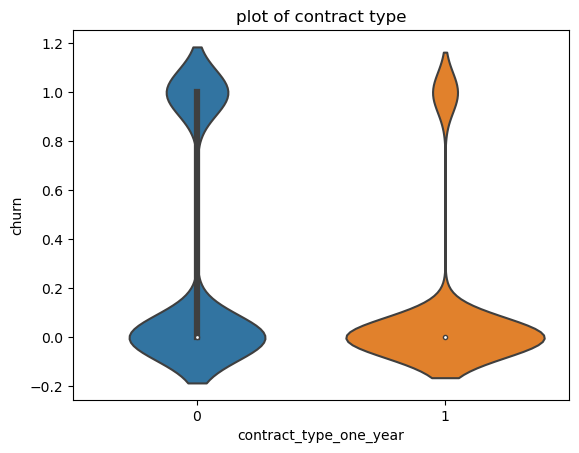

In [21]:
sns.violinplot(train,x='contract_type_one_year', y='churn')
plt.title('plot of contract type')
plt.show()

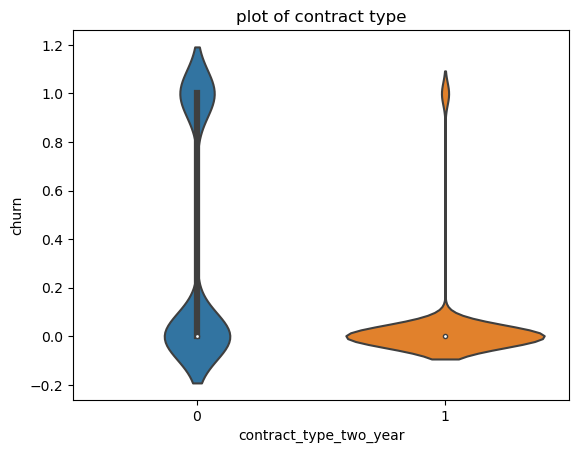

In [22]:
sns.violinplot(train,x='contract_type_two_year', y='churn')
plt.title('plot of contract type')
plt.show()

    Looks like the ony year has a higher churn rate let check if this exists in our hypothesis testing

    I need to to split my data so that i can be fitted in a model. We do this by only adding the columns we want to use as features and spliting the churn out 

    First we look at our train set and narrow it down to X_train, and
    y_train, where x train is the features and the y_train will be the traget variable.

In [23]:
train.columns

Index(['is_male', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'internet_service_type_fiber_optic', 'internet_service_type_none',
       'contract_type_one_year', 'contract_type_two_year',
       'payment_type_credit_card_(automatic)', 'payment_type_electronic_check',
       'payment_type_mailed_check', 'customer_id'],
      dtype='object')

In [24]:
feature_list = ['contract_type_one_year', 'contract_type_two_year', 'monthly_charges', 'total_charges', 'churn']

In [25]:
# X_train = train[feature_list].drop(columns='churn')
# y_train = train['churn']
########################## Now we do the same with validate and test ################################
# X_validate = validate[feature_list].drop(columns='churn')
# y_validate = validate['churn']
######################### Now to test ###############################################################
# X_test = test[feature_list].drop(columns='churn')
# y_test = test['churn']

    Now lets turn this into a function to use in our modeling notebook 

In [26]:
def X_and_y_split(train, validate, test):
    X_train = train[feature_list].drop(columns='churn')
    y_train = train['churn']
    ########################## Now we do the same with validate and test ################################
    X_validate = validate[feature_list].drop(columns='churn')
    y_validate = validate['churn']
    ######################### Now to test ###############################################################
    X_test = test[feature_list].drop(columns='churn')
    y_test = test['churn']
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [27]:
X_train, y_train, X_validate, y_validate, X_test, y_test = X_and_y_split(train, validate, test)